In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.special import beta as beta_func
from scipy.special import gammaln, xlogy
from scipy.integrate import quad
np.random.seed(42)

# Dirichlet Bridge

In [3]:
## functions

def softmax_transform(x):
    
    exp_ = exp(x)
    return(exp_/exp.sum())

def dirichlet_pdf(x, alpha):
    
    alpha = np.array(alpha)
    x = np.array(x)
    coef = np.sum(gammaln(alpha)) - gammaln(np.sum(alpha))  

    return(np.exp(- coef+ np.sum((xlogy(alpha-1, x.T)).T, 0)))

def dirichlet_t_softmax_pdf(x, alpha):
    
    alpha = np.array(alpha)
    x_sm = softmax_transform(np.array(x))
    coef = np.sum(gammaln(alpha)) - gammaln(np.sum(alpha))
    
    return(np.exp(- coef+ np.sum((xlogy(alpha, x_sm.T)).T, 0)))

def dirichlet_mu(alpha):
    alpha = np.array(alpha)
    K = len(alpha)
    return((alpha-1)/(alpha.sum()- K))
    
def dirichlet_Sigma(alpha):
    alpha = np.array(alpha)
    K = len(alpha)
    diag_ = (alpha - 1)/(alpha.sum() - K)**2
    n = len(alpha)
    S = np.zeros((n,n))
    np.fill_diagonal(S, diag_)
    return(S)
    
# softmax basis

def dirichlet_t_softmax_mu(alpha):
    
    alpha = np.array(alpha)
    log_ = np.log(alpha)
    K = len(alpha)
    return(log_ - 1/K * log_.sum())
    
def dirichlet_t_softmax_Sigma(alpha):
    
    alpha = np.array(alpha)
    K = len(alpha)
    alpha_sum = (1/alpha).sum()
    
    Sigma = np.zeros((K, K))
    for k in range(K):
        for l in range(K):
            v = -1/K * (1/alpha[k] + 1/alpha[l] - 1/K * alpha_sum)
            if k == l:
                v += 1/alpha[k]
            Sigma[k, l] =  v
            
    return(Sigma)

def inverse_softmax_transform(x, c=1):
    # Note: the softmax function is not bijective, hence has not one inverse.
    # inverses have the form of (log(x_0), log(x_1), ...) * C
    return(np.log(x) * c)


In [4]:
def beta_mu(a, b):
    return((a-1)/(a+b-2))

def beta_var(a, b):
    return(((a-1)*(b-1))/(a+b-2)**3)

"""transform: logit"""

def logit_transform(theta):
    return(np.log(theta/(1-theta)))

def logit_derivative(x):
    return(1/x + 1/(1-x))

def logistic_transform(a):
    return(1 / (1 + np.exp(-a)))

def logistic_derivative(x):
    return(logistic_transform(x) * (1- logistic_transform(x)))

def beta_t_logit_mu(a,b):
    return(np.log(a/b))

def beta_t_logit_var(a,b):
    return((a+b)/(a*b))

def beta_t_logit_pdf(x, a, b):
    x_t = logistic_transform(x)
    nom = (x_t) ** (a) * (1- x_t) ** (b)
    denom = beta_func(a, b)
    return((nom/denom))

def logit_normal_back(x, mu, sigma):
    x_ = logit_transform(x)
    return(norm.pdf(x_, mu, sigma) * logit_derivative(x))

In [5]:
## plotting

def plot_dirichlet_t_softmax(params, save=False, filename='dirichlet_softmax_bridge.pdf', show_back=True):
    
    a1 = params[0] 
    a2 = params[1] 
    a3 = params[2] 
    
    x_ = np.linspace(0,1, 1000 +1)
    x = np.array([[x_i, 1-x_i] for x_i in x_])
    
    print("using only 2D Dirichlet for plotting (i.e. the special case of the Beta dist.)")
    
    mode1 = dirichlet_mu(a1)[0]
    mode2 = dirichlet_mu(a2)[0]
    mode3 = dirichlet_mu(a3)[0]


    #plot1: normal base
    #Sigma1 = dirichlet_Sigma(a1)
    #Sigma2 = dirichlet_Sigma(a2)
    #Sigma3 = dirichlet_Sigma(a3)
    
    #print(Sigma2)
    #print(Sigma3)
    
    beta_sigma1 = np.sqrt(beta_var(a1[0], a1[1]))
    beta_sigma2 = np.sqrt(beta_var(a2[0], a2[1]))
    beta_sigma3 = np.sqrt(beta_var(a3[0], a3[1]))
    
    print(beta_sigma2, beta_sigma3)

    y1 = np.array([dirichlet_pdf(_, a1) for _ in x])
    y2 = np.array([dirichlet_pdf(_, a2) for _ in x])
    y3 = np.array([dirichlet_pdf(_, a3) for _ in x])
    
    print(np.shape(y1))
    
    LP_approx1 = norm.pdf(x_, mode1, beta_sigma1)
    LP_approx2 = norm.pdf(x_, mode2, beta_sigma2)
    LP_approx3 = norm.pdf(x_, mode3, beta_sigma3)
    
    print(np.shape(LP_approx1))

    #plot 2: transform to other base
    x_t = np.linspace(-4,4, 1000 + 1)
    
    #y1_t_softmax = dirichlet_t_softmax_pdf(x_t, a1)
    #y2_t_softmax = dirichlet_t_softmax_pdf(x_t, a2)
    #y3_t_softmax = dirichlet_t_softmax_pdf(x_t, a3)

    #mode1_t_softmax = dirichlet_t_softmax_mu(a1)
    #mode2_t_softmax = dirichlet_t_softmax_mu(a2)
    #mode3_t_softmax = dirichlet_t_softmax_mu(a3)

    #Sigma1_t_softmax = dirichlet_t_softmax_Sigma(a1)
    #Sigma2_t_softmax = dirichlet_t_softmax_Sigma(a2)
    #Sigma3_t_softmax = dirichlet_t_softmax_Sigma(a3)
    
    #LP_approx1_t_softmax = norm.pdf(x_t, mode1_t_softmax, sigma1_t_softmax)
    #LP_approx2_t_softmax = norm.pdf(x_t, mode2_t_softmax, sigma2_t_softmax)
    #LP_approx3_t_softmax = norm.pdf(x_t, mode3_t_softmax, sigma3_t_softmax)
    
    y1_t_logit = beta_t_logit_pdf(x_t, a1[0], a1[1])
    y2_t_logit = beta_t_logit_pdf(x_t, a2[0], a2[1])
    y3_t_logit = beta_t_logit_pdf(x_t, a3[0], a3[1])

    mode1_t_logit = beta_t_logit_mu(a1[0], a1[1])
    mode2_t_logit = beta_t_logit_mu(a2[0], a2[1])
    mode3_t_logit = beta_t_logit_mu(a3[0], a3[1])

    sigma1_t_logit = np.sqrt(beta_t_logit_var(a1[0], a1[1]))
    sigma2_t_logit = np.sqrt(beta_t_logit_var(a2[0], a2[1]))
    sigma3_t_logit = np.sqrt(beta_t_logit_var(a3[0], a3[1]))

    LP_approx1_t_logit = norm.pdf(x_t, mode1_t_logit, sigma1_t_logit)
    LP_approx2_t_logit = norm.pdf(x_t, mode2_t_logit, sigma2_t_logit)
    LP_approx3_t_logit = norm.pdf(x_t, mode3_t_logit, sigma3_t_logit)
    
    
    #plot 3: transform back and reconstruct
    if show_back:
        y1_back = logit_normal_back(x_, mode1_t_logit, sigma1_t_logit)
        y2_back = logit_normal_back(x_, mode2_t_logit, sigma2_t_logit)
        y3_back = logit_normal_back(x_, mode3_t_logit, sigma3_t_logit)

    """Plots"""
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw_size=3
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 4))
    #plot beta distribution and LPA in the standard basis
    axs[0].plot(x_, y1, 'r-', lw=lw_size)
    axs[0].plot(x_, y2, 'b-', lw=lw_size)
    axs[0].plot(x_, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[0].plot(x_, LP_approx1, 'r--', lw=lw_size)
    axs[0].plot(x_, LP_approx2, 'b--', lw=lw_size)
    axs[0].plot(x_, LP_approx3, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$\pi$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #plot beta distribution in the transformed basis
    axs[1].plot(x_t, y1_t_logit, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_logit, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_logit, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[1].plot(x_t, LP_approx1_t_logit, 'r--', lw=lw_size)
    axs[1].plot(x_t, LP_approx2_t_logit, 'b--', lw=lw_size)
    axs[1].plot(x_t, LP_approx3_t_logit, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[1].set_xlabel('x', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_title('Laplace in inverse-softmax basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    #plot backwards transformation of the LPA from the transformed to the standard basis
    if show_back:
        axs[2].plot(x_, y1, 'r-', lw=lw_size)
        axs[2].plot(x_, y2, 'b-', lw=lw_size)
        axs[2].plot(x_, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
        axs[2].plot(x_, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x_, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x_, y3_back, 'k--', lw=lw_size, label='$\mathcal{N}$')
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$\pi$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
        axs[2].set_title('Transformation back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    #plt.show()
    #plt.savefig('BetaVizTransformation.pdf')
    #tpl.save('BetaVizTransformation.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
    #         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})

    if save:
        plt.savefig(filename)

using only 2D Dirichlet for plotting (i.e. the special case of the Beta dist.)
0.2721655269759087 0.1870439059165649
(1001,)
(1001,)


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys

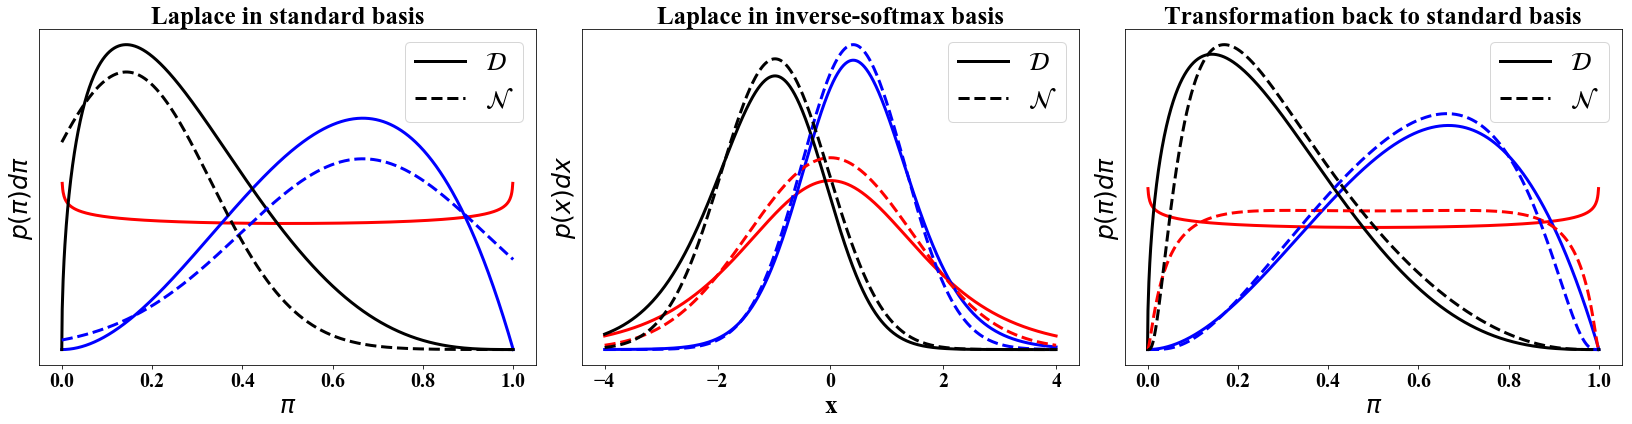

In [6]:
plot_dirichlet_t_softmax(params=[[0.95, 0.95], [3,2], [1.5, 4]], save=True, filename='dirichlet_softmax_bridge.pdf', show_back=True)

# Verify the Bridge

In [7]:
def alpha_from_normal(mu, Sigma):
    
    Sigma_diag = np.diagonal(Sigma)
    sum_mu_exp = np.sum(np.exp(-mu))
    K = len(mu)
    return(1/Sigma_diag * (1 - 2/K + np.exp(mu)/K**2 * sum_mu_exp))

test_a1 = np.array([1,2,3,4])
test_m1, test_S1 = dirichlet_t_softmax_mu(test_a1), dirichlet_t_softmax_Sigma(test_a1)
test_a2 = alpha_from_normal(test_m1, test_S1)
print(test_a2)

test_a3 = np.random.random(4)
test_m3, test_S3 = dirichlet_t_softmax_mu(test_a3), dirichlet_t_softmax_Sigma(test_a3)
test_a4 = alpha_from_normal(test_m3, test_S3)

assert(np.allclose(test_a3, test_a4))

[1. 2. 3. 4.]


# Statistical distance measures

In [8]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, beta, dirichlet
from scipy.stats import multivariate_normal as mv_norm
import torch

## MMD from 100 combinations of parameters

In [9]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params
    
    MMD_sum = 0
    MMD_t_softmax_sum = 0 

    for a in As:
            
        if verbose:
            print("a: ", a)
                
        if np.sum(a < 1) != 0:
            print("a_i < 1 doesn't yield a Laplace Approximation in standard basis")

        if np.sum(a) == len(a):
            print("sum of alphas is K, division through zero -> break")
            break

        #get samples from all dists
        #standard
        D_samples = dirichlet.rvs(a, size=n_samples)
        if np.sum(a < 1) == 0:                
            mode1 = dirichlet_mu(a)
            Sigma1 = dirichlet_Sigma(a)
            N_samples = mv_norm.rvs(mode1, Sigma1, size=n_samples)

        #softmax
        mode1_softmax = dirichlet_t_softmax_mu(a)
        Sigma1_softmax = dirichlet_t_softmax_Sigma(a)
        D_samples_softmax = inverse_softmax_transform(D_samples)
        #we align the means of the normal and the inverse softmax transform since we don't know the
        #exact value of the constant for the inversion c
        N_samples_softmax = mv_norm.rvs(mode1_softmax, Sigma1_softmax, size=n_samples)
        N_samples_softmax += np.mean(D_samples_softmax, axis=1).reshape(-1, 1)
        #print(np.shape(np.mean(D_samples_softmax, axis=1)))


        #calculate MMD for all bases
        MMD = MMDStatistic(n_samples, n_samples)

        #standard
        D_samples_ = torch.Tensor(D_samples.reshape((n_samples, -1)))
        if np.sum(a < 1) == 0:
            N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
            MMD_ = MMD(D_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            MMD_ = torch.max(torch.zeros(1), MMD_)
        else:
            MMD_ = torch.Tensor([np.nan])

        #softmax
        D_samples_softmax_ = torch.Tensor(D_samples_softmax.reshape((n_samples, -1)))
        N_samples_softmax_ = torch.Tensor(N_samples_softmax.reshape((n_samples, -1)))
        MMD_softmax_= MMD(D_samples_softmax_, N_samples_softmax_,  alphas=[0.5], ret_matrix=False)
        MMD_softmax_= torch.max(torch.zeros(1), MMD_softmax_)


        if plot:
            print("plot the marginal of the first entry for the Dirichlet (which is a beta distribution)")
            n_bins = int(np.sqrt(n_samples))
            fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(23, 6))
            axs[0].hist(D_samples[:,0], bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
            axs[0].hist(N_samples[:,0], bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            axs[0].set_title('standard basis')
            axs[0].legend()

            axs[1].hist(D_samples_softmax[:,0], bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
            axs[1].hist(N_samples_softmax[:,0], bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
            axs[1].set_title('inverse softmax basis')
            axs[1].legend()

            plt.show()

        if verbose: 
            print("standard: ", MMD_.item(), "softmax: ", MMD_softmax_.item())

        #add them to their respective sums
        MMD_sum += MMD_
        MMD_t_softmax_sum += MMD_softmax_

    return(MMD_sum.item(), MMD_t_softmax_sum.item())

In [10]:
np.random.seed(42)
random_params = np.random.uniform(low=1.0, high=3.0, size=(100, 4))
MMD_combinations(params=random_params, plot=False, verbose=True, n_samples=2000)

a:  [1.74908024 2.90142861 2.46398788 2.19731697]
standard:  0.00934535264968872 softmax:  0.0068028271198272705
a:  [1.31203728 1.31198904 1.11616722 2.73235229]
standard:  0.0866544246673584 softmax:  0.018397673964500427
a:  [2.20223002 2.41614516 1.04116899 2.9398197 ]
standard:  0.023051083087921143 softmax:  0.01566493511199951
a:  [2.66488528 1.42467822 1.36364993 1.36680902]
standard:  0.053951919078826904 softmax:  0.013710319995880127
a:  [1.60848449 2.04951286 1.86389004 1.58245828]
standard:  0.016927361488342285 softmax:  0.009124755859375
a:  [2.22370579 1.27898772 1.5842893  1.73272369]
standard:  0.034692585468292236 softmax:  0.009950190782546997
a:  [1.91213997 2.57035192 1.39934756 2.02846888]
standard:  0.017309904098510742 softmax:  0.011103063821792603
a:  [2.18482914 1.09290083 2.2150897  1.34104825]
standard:  0.050548672676086426 softmax:  0.014345526695251465
a:  [1.13010319 2.89777107 2.93126407 2.6167947 ]
standard:  0.014572203159332275 softmax:  0.01722484

standard:  0.025585055351257324 softmax:  0.0115947425365448
a:  [2.53998711 1.43164205 2.24578095 1.17069493]
standard:  0.042214274406433105 softmax:  0.01360030472278595
a:  [1.10336344 2.06270926 2.08127024 2.2748598 ]
standard:  0.026918649673461914 softmax:  0.012260913848876953
a:  [2.45218267 2.95170416 2.0326007  1.64591295]
standard:  0.010030031204223633 softmax:  0.009614229202270508
a:  [2.59037239 1.5416645  1.87794284 1.15691276]
standard:  0.03846317529678345 softmax:  0.013210222125053406
a:  [1.05070149 2.92529683 2.67196024 2.39194841]
standard:  0.018205344676971436 softmax:  0.018867820501327515
a:  [1.81790589 1.34658864 1.31287409 1.5004858 ]
standard:  0.04626953601837158 softmax:  0.01383914053440094
a:  [2.09845333 2.42919185 2.32039475 1.55986779]
standard:  0.011282503604888916 softmax:  0.009080439805984497
a:  [2.90973056 2.47579383 2.10870811 2.22344149]
standard:  0.004812657833099365 softmax:  0.006040513515472412
a:  [1.83920012 1.49546198 1.71194536 2

(3.423650026321411, 1.2087279558181763)

In [11]:
results_MMD = np.array([3.423650026321411, 1.2087279558181763])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.35305243]


## KL-divergence (mode seeking/backward, from samples)

In [12]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_samples(samples_1, samples_2, plot=False):
    
    assert(len(samples_1) == len(samples_2))
    n_bins = int(np.sqrt(np.sqrt(len(samples_1))))
    
    if not isinstance(samples_1, np.ndarray):
        samples_1 = samples_1.numpy()
        samples_2 = samples_2.numpy()
    
    #samples_1_min, samples_1_max = np.min(samples_1), np.max(samples_1)
    #samples_2_min, samples_2_max = np.min(samples_2), np.max(samples_2)
    
    #lb = np.min([samples_1_min, samples_2_min])
    #ub = np.max([samples_1_max, samples_2_max])
    
    #make histograms
    hist1, _ = np.histogramdd(samples_1, density=True, bins=[10,10,10])
    hist2, _ = np.histogramdd(samples_2, density=True, bins=[10,10,10])
    
    #print(hist1[:,4,4])
    #print(hist2[:,4,4])
    
    #print(hist1)
    #print(hist2)
    
    #don't divide by 0
    hist1 += 1e-8
    hist2 += 1e-8
    
    #calculate KL_div
    KL_div = (hist1 * np.log(hist1 / hist2))

    if plot:
        print("plotting 1D marginal of the Dirichlet which is a Beta")
        plt.plot(hist1[4,:,4], label='hist1')
        plt.plot(hist2[4,:,4], label='hist2')
        plt.plot(KL_div[4,:,4], lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))/n_bins
        
    return(KL_div)

In [13]:
#a = np.random.uniform(low=1.0, high=3.0, size=(1, 4))[0]
#a = np.array([1.1,1.1,1.1,1.1])
a = np.array([1.01,1.01,1.01])
n_samples = 1000000

mu = dirichlet_mu(a)
Sigma = dirichlet_Sigma(a)

D_samples = dirichlet.rvs(a, size=n_samples)
N_samples = mv_norm.rvs(mu, Sigma, size=n_samples)

print(D_samples[0])

[0.32863381 0.53537984 0.13598635]


In [14]:
print(KL_divergence_samples(D_samples, N_samples, plot=False))

564.7054665204608


In [15]:
mode1_softmax = dirichlet_t_softmax_mu(a)
Sigma1_softmax = dirichlet_t_softmax_Sigma(a)
D_samples_softmax = inverse_softmax_transform(D_samples)
#we align the means of the normal and the inverse softmax transform since we don't know the
#exact value of the constant for the inversion c
N_samples_softmax = mv_norm.rvs(mode1_softmax, Sigma1_softmax, size=n_samples)
#N_samples_softmax += np.mean(D_samples_softmax, axis=1).reshape(-1, 1)

In [16]:
print(KL_divergence_samples(D_samples_softmax, N_samples_softmax, plot=False))

0.1628778658689194


# Statistical distance measures for small, medium and large $\theta$

In [17]:
a_s = np.array([1.1, 1.1, 1.1])
a_m = np.array([2,2,3])
a_l = np.array([8,9,10])

## calculate MMD for the three pairs of parameters

In [18]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [a_s], n_samples=2000)
    MMD_m = MMD_combinations(params = [a_m], n_samples=2000)
    MMD_l = MMD_combinations(params = [a_l], n_samples=2000)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
a:  [1.1 1.1 1.1]
standard:  0.4105701446533203 softmax:  0.01778852939605713
a:  [2 2 3]
standard:  0.014313697814941406 softmax:  0.007753998041152954
a:  [ 8  9 10]
standard:  0.00014841556549072266 softmax:  0.00022453069686889648
seed:  1
a:  [1.1 1.1 1.1]
standard:  0.4120229482650757 softmax:  0.01794576644897461
a:  [2 2 3]
standard:  0.014432728290557861 softmax:  0.006687343120574951
a:  [ 8  9 10]
standard:  0.00038057565689086914 softmax:  0.00020134449005126953
seed:  2
a:  [1.1 1.1 1.1]
standard:  0.41213053464889526 softmax:  0.01704534888267517
a:  [2 2 3]
standard:  0.013632476329803467 softmax:  0.008370906114578247
a:  [ 8  9 10]
standard:  0.00023126602172851562 softmax:  2.384185791015625e-06
seed:  3
a:  [1.1 1.1 1.1]
standard:  0.4089943468570709 softmax:  0.018064051866531372
a:  [2 2 3]
standard:  0.014778554439544678 softmax:  0.005811423063278198
a:  [ 8  9 10]
standard:  0.00021570920944213867 softmax:  0.00015693902969360352
seed:  4
a:  [1.1 1.1 1

In [19]:
# normalize to 1 for comparison
#MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
#MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[1.         0.04340909]
[1.         0.52151738]
[1.         0.93784547]


## calculate KL div for the three parameters

In [20]:
def KL_combinations(params, n_samples=10000, verbose=True):
    
    a = np.array(params).reshape(-1)

    mu = dirichlet_mu(a)
    Sigma = dirichlet_Sigma(a)

    D_samples = dirichlet.rvs(a, size=n_samples)
    N_samples = mv_norm.rvs(mu, Sigma, size=n_samples)
    
    KL_ = KL_divergence_samples(D_samples, N_samples, plot=False)
    
    ####softmax base
    mode1_softmax = dirichlet_t_softmax_mu(a)
    Sigma1_softmax = dirichlet_t_softmax_Sigma(a)
    D_samples_softmax = inverse_softmax_transform(D_samples)
    N_samples_softmax = mv_norm.rvs(mode1_softmax, Sigma1_softmax, size=n_samples)
    
    KL_softmax_ = KL_divergence_samples(D_samples_softmax, N_samples_softmax, plot=False)
    
    if verbose: 
            print("standard: ", KL_.item(), "softmax: ", KL_softmax_.item())
            
    return([KL_, KL_softmax_])

In [21]:
# use 10 seeds
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)    
    KL_s = KL_combinations(params = [a_s], n_samples=100000)
    KL_m = KL_combinations(params = [a_m], n_samples=100000)
    KL_l = KL_combinations(params = [a_l], n_samples=100000)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
standard:  887.8013295653157 softmax:  0.5406027005079121
standard:  590.6833473833866 softmax:  3.4835147160278135
standard:  695.306517717241 softmax:  61.84794616066415
seed:  1
standard:  855.515203519831 softmax:  0.6337406410940895
standard:  547.8241573354835 softmax:  3.1501864828720443
standard:  585.0649110543211 softmax:  55.58790235316518
seed:  2
standard:  965.3588267345549 softmax:  0.48085229411969266
standard:  657.3456089416179 softmax:  4.074570049350606
standard:  689.5101274595145 softmax:  67.43816163382756
seed:  3
standard:  880.4251769375601 softmax:  0.5784158481742603
standard:  615.0355277695794 softmax:  3.78725031334898
standard:  640.1349419076821 softmax:  71.57288253592158
seed:  4
standard:  886.3258961814029 softmax:  0.6000924679478312
standard:  806.654415717472 softmax:  4.017319063393156
standard:  728.1141491063157 softmax:  64.02820833096524
seed:  5
standard:  875.1791967720746 softmax:  0.39931704085035835
standard:  628.093082114366 

In [22]:
# normalize to 1 for comparison
#KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
#KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[1.00000000e+00 6.10457013e-04]
[1.         0.00598561]
[1.        0.0961311]
